# Evaluating a machine learning model

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

### Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in score() method  
2. The scoring parameter  
3. Problem-specific metric functions
   
You can read more about these here:  
https://scikit-learn.org/stable/modules/model_evaluation.html

## 1. Evaluating the model with `score` method

### 1.1 Classification Problem

In [7]:
heart_disease = pd.read_csv("resources/heart-disease.csv")
heart_disease.head()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.8688524590163934

### 1.2 Regression Problem

In [11]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

# Getting it into a dataframe
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df.head()

# Add a target variable to the dataframe from our dataset
housing_df["target"] = housing["target"]
housing_df.head()

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8066196804802649

## 2. Evaluating a model using the `scoring` parameter

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [15]:
clf.score(X_test, y_test)

0.8524590163934426

The cross_val_score function in scikit-learn evaluates a model's performance using cross-validation. It repeatedly splits the data into training and testing sets, trains the model on the training data, and computes a score on the test data for each split (or "fold"). The function returns an array of these scores, providing a more robust estimate of how the model is expected to perform on unseen data compared to a single train-test split. 

In [16]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [17]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [18]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [19]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()
# Scoring parameter set to None by default 
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 3. Classification model evaluation metrics
* Accuracy  
* Area under ROC curve  
* Confusion matrix  
* Classification report  

### 3.1 Accuracy

In [39]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [43]:
np.mean(cross_val_score)

0.8248087431693989

In [45]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


### 3.2 Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)  
* Receiver Operating Characteristics (ROC curve)  

ROC curves are a comparison of a model's `true postive rate (tpr)` versus a models `false positive rate (fpr)`.

* True positive = model predicts 1 when truth is 1  
* False positive = model predicts 1 when truth is 0  
* True negative = model predicts 0 when truth is 0  
* False negative = model predicts 0 when truth is 1

For more information on these metrics, bookmark the following resources and refer to them when you need:  

[ROC and AUC, Clearly Explained!](https://www.youtube.com/watch?v=4jRBRDbJemM) by StatQuest  
[ROC documentation in Scikit-Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) (contains code examples)  
[How the ROC curve and AUC are calculated](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) by Google's Machine Learning team   

In [48]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [52]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [54]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

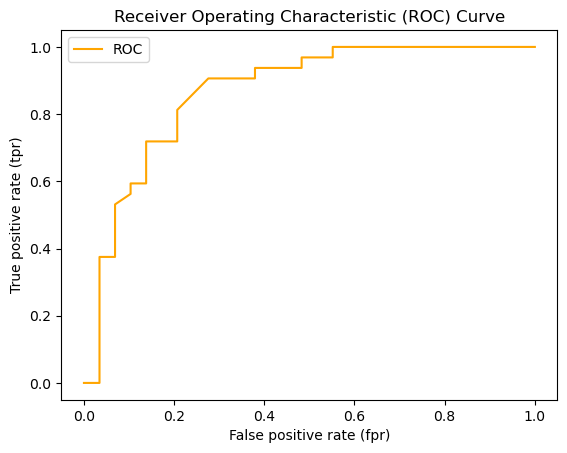

In [56]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

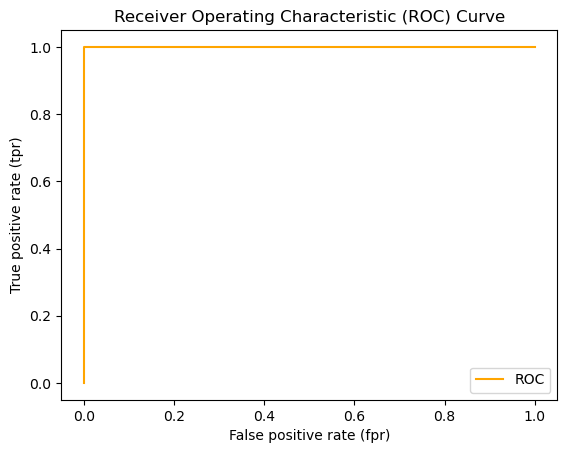

In [60]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [62]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

##### Final Notes 

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).  

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.  
The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not).

* A perfect model will get an AUC score of 1.


### 3.3 Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix.](https://en.wikipedia.org/wiki/Confusion_matrix)  

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [72]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [74]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


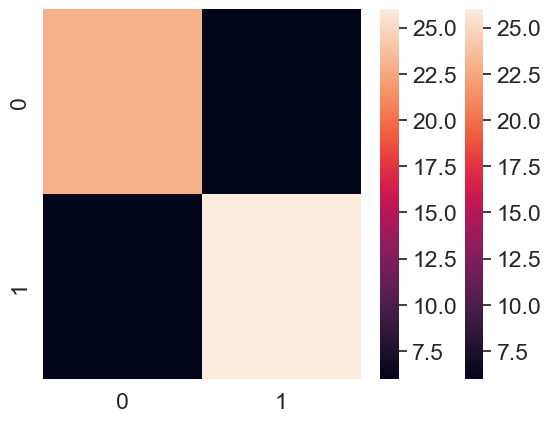

In [115]:
# For the below to work install seabourn module
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);
plt.show()

#### Creating a confusion matrix using Scikit-Learn  
Scikit-Learn has multiple different implementations of plotting confusion matrices:  

1. sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y) - this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.  
2. sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.  
Note: Both of these methods/classes require Scikit-Learn 1.0+.

To check your version of Scikit-Learn run:  

In [80]:
import sklearn
sklearn.__version__
# If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

'1.7.1'

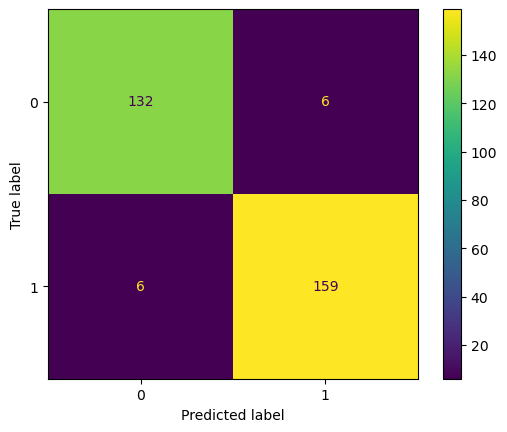

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);
plt.show()

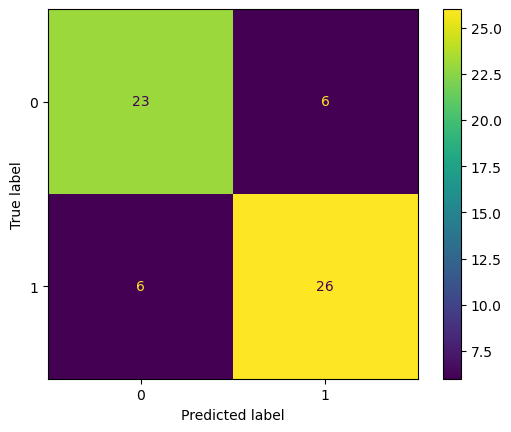

In [110]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);
plt.show()

### 3.4 Classification Report

A classification report is more so a collection of metrics rather than a single one.  

You can create a classification report using Scikit-Learn's [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) method.


* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



It returns four columns: precision, recall, f1-score and support.  

The number of rows will depend on how many different classes there are.   
But there will always be three rows labell accuracy, macro avg and weighted avg.

In [129]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### To summarize classification model evaluation metrics:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* Precision and recall become more important when classes are imbalanced.  
If false positive predictions are worse than false negatives, aim for higher precision.  
If false negative predictions are worse than false positives, aim for higher recall.  
* F1-score is a combination of precision and recall.

## 4. Regression model evaluation metrics
Model evaluation metrics documentation -  
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

* R^2 (pronounced r-squared) or coefficient of determination
* Mean absolute error (MAE)
* Mean squared error (MSE)

For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.

### 4.1 R^2

What R-squared does:  
Compares your model's predictions to the mean of the targets.  
Values can range from negative infinity (a very poor model) to 1.  
For example, if all your model does is predict the mean of the targets, its R^2 value would be 0.  
And if your model perfectly predicts a range of numbers, its R^2 value would be 1.  

In [176]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [168]:
# Once you've got a trained regression model, the default evaluation metric in the score() function is R^2.
model.score(X_test, y_test)

0.8066196804802649

In [154]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [156]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [158]:
# 
y_test.mean()

2.0550030959302323

In [170]:
# Outside of the score() function, R^2 can be calculated using Scikit-Learn's r2_score() function.

from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [162]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [164]:
# A model that only predicted the mean would get a score of 0.
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [172]:
# And a perfect model would get a score of 1.
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

### 4.2 Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values.  

It gives you an idea of how wrong your models predictions are.  

A model's mean absolute error can be calculated with Scikit-Learn's `sklearn.metrics.mean_absolute_error` method.

In [181]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

Our model achieves an MAE of 0.327.  

This means, on average, our models' predictions are 0.327 units away (plus or minus) from the actual value. 

Let's make it a little more visual.  

In [183]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


You can see the predictions are slightly different from the actual values.  

Depending on what problem you're working on, having a difference as we do now might be okay.  
On the flip side, it may also not be okay, meaning the predictions would have to be closer.

In [185]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3265721842781009

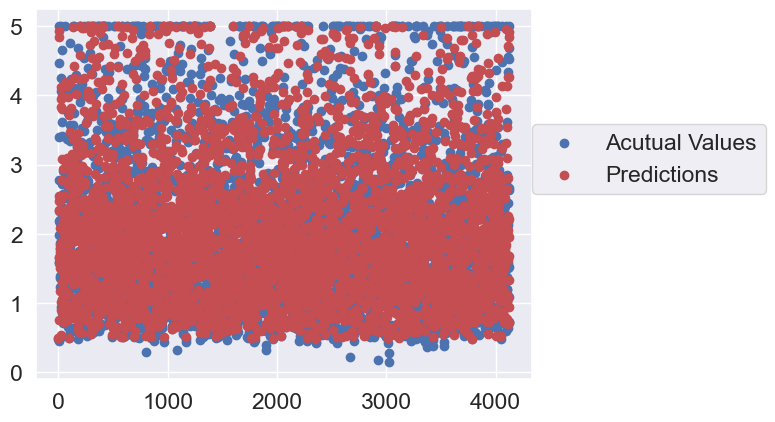

In [200]:
# Visualizing actual vs predicted values
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predicted values"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));
plt.show()

### 4.3 Mean squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values.  

We can calculate it with Scikit-Learn's `sklearn.metrics.mean_squared_error`.

In [204]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

MSE will often be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

In [206]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [208]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534073069137548

In [212]:
df_large_error = df.copy()
# df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample
df_large_error.loc[df_large_error.index[0], "squared_differences"] = 16

In [214]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [216]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.25728320720794084

In [218]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,20.000000
15663,5.00001,4.928596,-0.071414,20.000000
20484,2.18600,2.540290,0.354290,20.000000
9814,2.78000,2.331760,-0.448240,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [255]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

0.7333540351264799

Now you might be thinking, which regression evaluation metric should you use?  

* R^2 is similar to accuracy. It gives you a quick indication of how well your model is performing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions is on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
    * Pay more attention to MAE: When being \$10,000 off is **twice** as bad as being \$5,000 off.  
    * Pay more attention to MSE: When being \$10,000 off is **more than twice** as bad as being \$5,000 off.  
    
Note: What we've covered here is only a handful of potential metrics you can use to evaluate your models. If you're after a complete list, check out the Scikit-Learn metrics and scoring documentation.

# Machine Learning Model Evaluation - Summary

Evaluating the results of a machine learning model is as important as building one.  
But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.  
Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

## <u>Classification</u>

### Classification Model Evaluation Metrics/Techniques

1. Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

2. Precision - Indicates the proportion of positive identifications (model predicted class 1) 
which were actually correct. A model which produces no false positives has a precision of 1.0.

3. Recall - Indicates the proportion of actual positives which were correctly classified. 
A model which produces no false negatives has a recall of 1.0.

4. F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

5. Confusion matrix - Compares the predicted values with the true values in a tabular way, 
if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

6. Cross-validation - Splits your dataset into multiple parts and train and 
tests your model on each part then evaluates performance as an average.

7. Classification report - Sklearn has a built-in function called classification_report() 
which returns some of the main classification metrics such as precision, recall and f1-score.

8. ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate 
versus false-positive rate.

9. Area Under Curve (AUC) Score - The area underneath the ROC curve. 
A perfect model achieves an AUC score of 1.0.

### Which classification metric should you use?

1. Accuracy is a good measure to start with if all classes are balanced 
(e.g. same amount of samples which are labelled with 0 or 1).

2. Precision and recall become more important when classes are imbalanced.

3. If false-positive predictions are worse than false-negatives, 
aim for higher precision.

4. If false-negative predictions are worse than false-positives, aim for higher recall.

5. F1-score is a combination of precision and recall.

6. A confusion matrix is always a good way to visualize how a classification model is going.

## <u> Regression </u>

## Regression Model Evaluation Metrics/Techniques

1. R^2 (pronounced r-squared) or the coefficient of determination - 
Compares your model's predictions to the mean of the targets. 
Values can range from negative infinity (a very poor model) to 1. 
For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. 
And if your model perfectly predicts a range of numbers, its R^2 value would be 1.

2. Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your predictions were.

4. Mean squared error (MSE) - The average squared differences between predictions and actual values.
Squaring the errors removes negative errors. It also amplifies outliers (samples that have larger errors).

## Which regression metric should you use?

1. R2 is similar to accuracy. 
It gives you a quick indication of how well your 
model might be doing. Generally, the closer your R2 value is to 1.0, 
the better the model. But it doesn't really tell exactly how wrong your 
model is in terms of how far off each prediction is.

2. MAE gives a better indication of how far off each of your model's predictions is on average.

3. As for MAE or MSE, because of the way MSE is calculated, 
Squaring the differences between predicted values and actual values amplifies larger differences. 
Let's say we're predicting the value of houses (which we are).  
* Pay more attention to MAE: When being \$10,000 off is **twice as bad** as being \$5,000 off.  
* Pay more attention to MSE: When being \$10,000 off is **more than twice as bad** as being \$5,000 off.  

## For more resources on evaluating a machine learning model, be sure to check out the following resources:

[scikit-learn documentation for metrics and scoring (quantifying the quality of predictions)](
https://scikit-learn.org/stable/modules/model_evaluation.html)

[Beyond Accuracy: Precision and Recall by Will Koehrsen](https://medium.com/towards-data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c)

[Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python/37861832#37861832)